<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/cern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CERN: [International Conference on Quantum Technologies for High-Energy Physics](https://indico.cern.ch/event/1190278/)**

**Annalisa Pawlosky, PhD**, *Senior Research Scientist at Google*

[Google Scholar](#) $\cdot$ [LinkedIn](https://www.linkedin.com/in/annalisa-pawlosky-bb7579178/)

**Alexander Del Toro Barba, PhD**, *Quantum Computing Practice Lead at Google Cloud*

[Google Scholar](https://scholar.google.com/citations?hl=en&user=fddyK-wAAAAJ) $\cdot$ [LinkedIn](https://www.linkedin.com/in/deltorobarba/)


#### **[Install Libraries]**

*You can view this notebook shared publicly without sign-in. But in order to execute code, a Google account sign-in is required. Instructions to create a Google account are [here](https://support.google.com/accounts/answer/27441?hl=en).*

In [ ]:
!pip install tensorflow==2.7.0 -q
!pip install tensorflow-quantum==0.7.2 -q

import importlib, pkg_resources
importlib.reload(pkg_resources)

import cirq_google
import tensorflow as tf
import tensorflow_quantum as tfq


import math
import cirq
import sympy
import numpy as np
import seaborn as sns
import networkx as nx
from sympy import Matrix
from sympy.physics.quantum import TensorProduct

%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

print('Cirq version:', cirq.__version__)
print('TensorFlow version:', tf.__version__)
print('TensorFlow Quantum version:', tfq.__version__)

     |████████████████████████████████| 665.5 MB 22 kB/s 
     |████████████████████████████████| 463 kB 5.4 MB/s 
     |████████████████████████████████| 1.3 MB 29.7 MB/s 
     |████████████████████████████████| 10.5 MB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 45.8 MB/s 
     |████████████████████████████████| 90 kB 8.3 MB/s 
     |████████████████████████████████| 90 kB 8.4 MB/s 
     |████████████████████████████████| 6.1 MB 48.7 MB/s 
     |████████████████████████████████| 100 kB 9.7 MB/s 
     |████████████████████████████████| 576 kB 51.0 MB/s 
     |████████████████████████████████| 47 kB 4.8 MB/s 
     |████████████████████████████████| 641 kB 44.1 MB/s 
     |████████████████████████████████| 541 kB 52.4 MB/s 
     |████████████████████████████████| 541 kB 67.6 MB/s 
     |████████████████████████████████| 437 kB 72.9 MB/s 
     |████████████████████████████████| 115 kB 58.5 MB/s 
     |████████████████████████████████| 115 kB 43.0 MB/s 
     |████████████████

#### **Part 1: Quantum Computing with <font color="blue">Cirq**

###### *Assets for you*

 * Homepage: [quantumai.google/cirq](https://quantumai.google/cirq)

* Youtube video series: [Getting started with Cirq 1.0](https://www.youtube.com/watch?v=4OQrPHmjpVc&list=PLpO2pyKisOjLVt_tDJ2K6ZTapZtHXPLB4)

* See following notebook and many more information [here](https://quantumai.google/cirq/start/basics)

###### *Complete Introductory Example*

In [ ]:
# Create Vanilla Qubits
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

qubits = cirq.LineQubit.range(3)

# Create Operation
ops=[cirq.X(a),
     cirq.CCNOT(a,b, c),
     cirq.measure(a),
     cirq.measure(b),
     cirq.measure(c)]
circuit=cirq.Circuit(ops)
print(circuit)

a: ───X───@───M───
          │
b: ───────@───M───
          │
c: ───────X───M───


Measurement results: a=1111111111
b=0000000000
c=0000000000


Counter({1: 10})

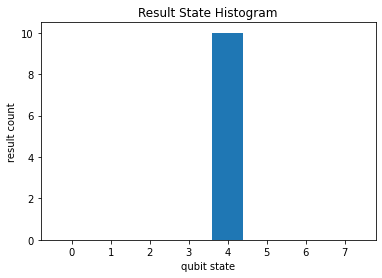

In [ ]:
# Run Simulation, Measure and Visualize
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=10)
print('Measurement results:', result) # 0: 00, 1: 01, 2: 10, 3: 11 etc
_ = cirq.vis.plot_state_histogram(result, plt.subplot())
result.histogram(key="a")

In [ ]:
# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit
circuit = cirq.Circuit(
    cirq.X(qubit)**0.5,  # Square root of NOT.
    cirq.measure(qubit, key='m')  # Measurement.
)
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=10100111001101100000


###### *Qubits*

The first part of creating a quantum circuit is to define a set of qubits (also known as a quantum register) to act on. 

Cirq has three main ways of defining qubits:

* **cirq.NamedQubit**: used to label qubits by an abstract name.
* **cirq.LineQubit**: qubits labelled by number in a linear array.
* **cirq.GridQubit**: qubits labelled by two numbers in a rectangular lattice.

In [ ]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4, 5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

There are also pre-packaged sets of qubits called [Devices](https://quantumai.google/cirq/hardware/devices). These are qubits along with a set of rules for how they can be used. 

A cirq.Device can be used to ensure that two-qubit gates are only applied to qubits that are adjacent in the hardware, and other constraints. The following example will use the cirq_google.Sycamore device that comes with cirq. It is a diamond-shaped grid with 54 qubits that mimics early hardware released by Google.

![sycamore](https://4.bp.blogspot.com/-b9akad6ismU/WpmyaJo-cYI/AAAAAAAACa8/mCqPBJxv5oUivy6Jq42FSOQYkeRlTmkiwCLcBGAs/s1600/image1.png)

In [ ]:
my_device = cirq_google.Sycamore
print(my_device)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

###### *Gates and Operations*

* A Gate is an effect that can be applied to a set of qubits.

* An Operation is a gate applied to a set of qubits.

For instance, cirq.H is the quantum Hadamard and is a Gate object. cirq.H(cirq.LineQubit(1)) is an Operation object and is the Hadamard gate applied to a specific qubit (line qubit number 1).

Many textbook gates are included within cirq. cirq.X, cirq.Y, and cirq.Z refer to the single-qubit Pauli gates. cirq.CZ, cirq.CNOT, cirq.SWAP are a few of the common two-qubit gates. cirq.measure is a macro to apply a MeasurementGate to a set of qubits. You can find more, as well as instructions on how to create your own custom gates, on the [Gates documentation](https://quantumai.google/cirq/build/gates) page.

In [ ]:
# Example gates
cnot_gate = cirq.CNOT
pauli_z = cirq.Z

# Use exponentiation to get square root gates.
sqrt_x_gate = cirq.X**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Create two qubits at once, in a line.
q0, q1 = cirq.LineQubit.range(2)

# Example operations
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

# You can also use the gates you specified earlier.
cnot_op = cnot_gate(q0, q1)
pauli_z_op = pauli_z(q0)
sqrt_x_op = sqrt_x_gate(q0)
sqrt_sqrt_y_op = sqrt_sqrt_y(q0)

###### *Circuits and moments*

You are now ready to construct a quantum circuit. A Circuit is a collection of Moments. 

A Moment is a collection of Operations that all act during the same abstract time slice. Each Operation must be applied to a disjoint set of qubits compared to each of the other Operations in the Moment. A Moment can be thought of as a vertical slice of a quantum circuit diagram.

![moments](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1212.png)

Circuits can be constructed in several different ways. By default, Cirq will attempt to slide your operation into the earliest possible Moment when you insert it. You can use the append function in two ways:

By appending each operation one-by-one:

In [ ]:
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
print(circuit)

0: ───H───

1: ───H───

2: ───H───


Or by appending some iterable of operations. A preconstructed list works:

In [ ]:
circuit = cirq.Circuit()
ops = [cirq.H(q) for q in cirq.LineQubit.range(3)]
circuit.append(ops)
print(circuit)

0: ───H───

1: ───H───

2: ───H───


A generator that yields operations also works. This syntax will be used often in documentation, and works both with the cirq.Circuit() initializer and the cirq.Circuit.append() function (for example used in Phase Estimation to append inverse Quantum Fourier Transform)

In [ ]:
# Append with generator
circuit = cirq.Circuit()
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
print(circuit)
# Initializer with generator
print(cirq.Circuit(cirq.H(q) for q in cirq.LineQubit.range(3)))

0: ───H───

1: ───H───

2: ───H───
0: ───H───

1: ───H───

2: ───H───


In [ ]:
"""Creating a circuit."""
# Define three qubits.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

# Define a list of operations.
ops = [cirq.H(a), 
       cirq.H(b), 
       cirq.CNOT(b, c), 
       cirq.H(b)]

# Create a circuit from the list of operations.
circuit = cirq.Circuit(ops)
print("Circuit:\n")
print(circuit)

Circuit:

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


If your operations are applied to the same qubits, they will be put in sequential, insertion-ordered moments. In the following example, the two-qubit gates overlap, and are placed in consecutive moments.

In [ ]:
print(cirq.Circuit(cirq.SWAP(q, q + 1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


Sometimes, you may not want Cirq to automatically shift operations all the way to the left. To construct a circuit without doing this, you can create the circuit moment-by-moment or use a different InsertStrategy, explained more in the [Circuit documentation](https://quantumai.google/cirq/build/circuits)



In [ ]:
# Creates each gate in a separate moment by passing an iterable of Moments instead of Operations.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


<font color="blue">**Tensor-Multiplication (Kronecker) for combination of operators within one moment** *Two systems being described as a joint system*

> $\left[\begin{array}{ll}a & b \\ c & d\end{array}\right] \otimes\left[\begin{array}{ll}e & f \\ g & h\end{array}\right]=\left[\begin{array}{lll}a\left[\begin{array}{ll}e & f \\ g & h\end{array}\right] & b\left[\begin{array}{ll}e & f \\ g & h\end{array}\right] \\ c\left[\begin{array}{ll}e & f \\ g & h\end{array}\right] & d\left[\begin{array}{llll}e & f \\ g & h\end{array}\right]\end{array}\right]=\left[\begin{array}{llll}a e & a f & \text { be } & b f \\ a g & a h & b g & b h \\ c e & c f & d e & d f \\ c g & c h & d g & d h\end{array}\right]$

Example with Pauli X and Pauli Y gate

> $Y \otimes X=\left[\begin{array}{cc}0 & -i \\ i & 0\end{array}\right] \otimes\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=\left[\begin{array}{ll}0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & -i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] \\ i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & 0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]\end{array}\right]=\left[\begin{array}{cccc}0 & 0 & 0 & -i \\ 0 & 0 & -i & 0 \\ 0 & i & 0 & 0 \\ i & 0 & 0 & 0\end{array}\right]$


In [ ]:
m1 = Matrix([[1],[0]])
m2 = Matrix([[1],[0]])
m3 = Matrix([[1],[0]])

matrix = TensorProduct(m1, m2, m3)
matrix

Matrix([
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

**<font color="blue">Usual Matrix-Multiplication for serially wired gates** *A line in the circuit is considered as a quantum wire and basically represents a single qubit. The product of operators keeps the same dimension*


![ggg](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Serially_wired_quantum_logic_gates.png/500px-Serially_wired_quantum_logic_gates.png)

Putting the Pauli X gate after the Pauli Y gate (both act on a single qubit) can be described as a single combined gate C:

>$C = X \cdot Y=\left[\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right] \cdot\left[\begin{array}{cc}
0 & -i \\
i & 0
\end{array}\right]=\left[\begin{array}{cc}
i & 0 \\
0 & -i
\end{array}\right]
$

>$
X \cdot X=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)=\left(\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right)=I
$

###### *Circuits and devices*

One important consideration when using real quantum devices is that there are often constraints on circuits that are able to be run on the hardware. Device objects specify these constraints and can be used to validate your circuit to make sure that it contains no illegal operations. For more information on what constraints Device objects can specify and how to use them, see the [Devices page](https://quantumai.google/cirq/hardware/devices).

The following example demonstrates this with the Sycamore Device:

In [ ]:
# Create some qubits.
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Create operations using the Sycamore gate, which is supported by the Sycamore device.
# However, create operations for both adjacent and non-adjacent qubit pairs.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print(e)

Operation does not use valid qubit target: SYC((5, 6), (4, 5)).


###### *Simulation*

The results of the application of a quantum circuit can be calculated by a Simulator. Cirq comes bundled with a simulator that can calculate the results of circuits up to about a limit of 20 qubits. It can be initialized with [cirq.Simulator()](https://quantumai.google/reference/python/cirq/Simulator).

There are two different approaches to using a simulator:

* **simulate():** When classically simulating a circuit, a simulator can directly access and view the resulting wave function. This is useful for debugging, learning, and understanding how circuits will function.

* **run():** When using actual quantum devices, we can only access the end result of a computation and must sample the results to get a distribution of results. Running the simulator as a sampler mimics this behavior and only returns bit strings as output.

Next simulate a 2-qubit "Bell State":

In [ ]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
samples = s.run(bell_circuit, repetitions=1000)

Simulate the circuit:
measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩


**Virtual Machine Simulation**

Cirq also provides the [Quantum Virtual Machine](https://quantumai.google/cirq/simulate/quantum_virtual_machine), which is a simulated virtual version of quantum hardware devices. It consists of two primary components:

1. A virtual [Engine interface](https://quantumai.google/cirq/simulate/virtual_engine_interface) that enables you to verify and run circuits with the same interface that quantum hardware would have.

2. A set of noise models that try to realistically replicate the noise present in actual Google quantum hardware devices.

The QVM is intended to serve as a replacement for the Google quantum hardware, in two cases:

1. Running your circuit on a QVM can give an approximation of how your circuit runs under the influence of hardware-like noise. This can be useful to help you reconfigure or change your circuit to be less impacted by noise when run on actual quantum hardware.

2. During the preparation process before running your circuit(s) on hardware, you can seamlessly use a QVM to test that your workflow or pipeline works before eventually switching to the nearly-identical hardware interface.

Read more about the QVM and its uses in the [Quantum Virtual Machine page](https://quantumai.google/cirq/simulate/quantum_virtual_machine), or just start using it with the [QVM Creation Template page](https://quantumai.google/cirq/simulate/qvm_builder_code).

###### *Visualizing Results*

When you use run() to get a sample distribution of measurements, you can directly graph the simulated samples as a histogram:



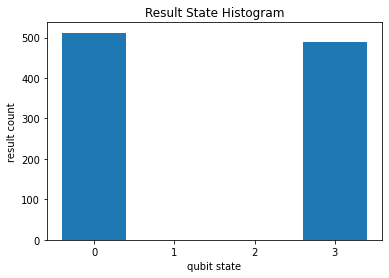

In [ ]:
cirq.vis.plot_state_histogram(samples, plt.subplot())
plt.show()

However, this histogram has some empty qubit states, which may become problematic if you work with more qubits. To graph sparse sampled data, first get the Counts from your results with its histogram() function, and pass that to cirq.plot_state_histogram. By collecting the results into counts, all the qubit states that were never seen are ignored.

In [ ]:
# Pull of histogram counts from the result data structure
counts = samples.histogram(key='result')
print(counts)

Counter({0: 512, 3: 488})


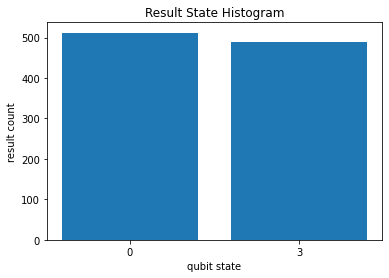

In [ ]:
# Graph the histogram counts instead of the results
cirq.vis.plot_state_histogram(counts, plt.subplot())
plt.show()

A histogram over the states that were actually observed can often be more useful when analyzing results. To learn more about the available options for creating result histograms, see the [State Histograms](https://quantumai.google/cirq/simulate/state_histograms) page.



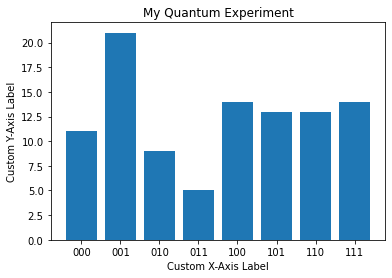

In [ ]:
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

q = cirq.LineQubit.range(3)
circuit = cirq.Circuit([cirq.H.on_each(*q), cirq.measure(*q)])
result = cirq.Simulator().run(circuit, repetitions=100)
_ = cirq.vis.plot_state_histogram(result, plt.subplot(), title = 'My Quantum Experiment', xlabel = 'Custom X-Axis Label', ylabel = 'Custom Y-Axis Label', tick_label=binary_labels(3))
plt.show()

###### *Using Parameter Sweeps*

Cirq circuits allow for gates to have symbols as free parameters within the circuit. This is especially useful for variational algorithms, which vary parameters within the circuit in order to optimize a cost function, but it can be useful in a variety of circumstances.

For parameters, Cirq uses the library sympy to add sympy.Symbol as parameters to gates and operations.

Once the circuit is complete, you can fill in the possible values of each of these parameters with a Sweep. There are several possibilities that can be used as a sweep:

* [**cirq.Points**](https://quantumai.google/reference/python/cirq/Points): A list of manually specified values for one specific symbol as a sequence of floats.
* [**cirq.Linspace**](https://quantumai.google/reference/python/cirq/Linspace): A linear sweep from a starting value to an ending value.
* [**cirq.ListSweep**](https://quantumai.google/reference/python/cirq/ListSweep): A list of manually specified values for several different symbols, specified as a list of dictionaries.
* [**cirq.Zip**](https://quantumai.google/reference/python/cirq/Zip) and [**cirq.Product**](https://quantumai.google/reference/python/cirq/Product): Sweeps can be combined list-wise by zipping them together or through their Cartesian product.

A parameterized circuit and sweep together can be run using the simulator or other sampler by changing run() to run_sweep() and adding the sweep as a parameter.

Here is an example of sweeping an exponent of a X gate:

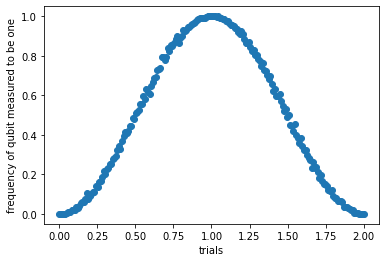

In [ ]:
# Perform an X gate with variable exponent
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.show()

###### *Decompositions*

Many gates can be decomposed into an equivalent circuit with simpler operations and gates. This is called decomposition and can be accomplished with the [cirq.decompose](https://quantumai.google/reference/python/cirq/decompose) protocol.

For instance, a Hadamard H gate can be decomposed into X and Y gates:

In [ ]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(exponent=1.0, global_shift=-0.25).on(cirq.LineQubit(0))]


Another example is the 3-qubit Toffoli gate, which is equivalent to a controlled-controlled-X gate. Many devices do not support three qubit gates, so it is important to decompose them into one and two qubit gates.

In [ ]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


The above decomposes the Toffoli into a simpler set of one-qubit gates and two-qubit CZ gates at the cost of lengthening the circuit considerably.



#### **Part 2: Quantum Machine Learning with <font color="blue">TensorFlow Quantum**

##### ***Use Case 1: Hello, many worlds***

###### *Cirq Basics Review*

[This tutorial](https://www.tensorflow.org/quantum/tutorials/hello_many_worlds) shows how a classical neural network can learn to correct qubit calibration errors. It introduces <a target="_blank" href="https://github.com/quantumlib/Cirq" class="external">Cirq</a>, a Python framework to create, edit, and invoke Noisy Intermediate Scale Quantum (NISQ) circuits, and demonstrates how Cirq interfaces with TensorFlow Quantum.

**Cirq and parameterized quantum circuits**

Before exploring TensorFlow Quantum (TFQ), let's look at some <a target="_blank" href="https://github.com/quantumlib/Cirq" class="external">Cirq</a> basics. Cirq is a Python library for quantum computing from Google. You use it to define circuits, including static and parameterized gates.

Cirq uses <a target="_blank" href="https://www.sympy.org" class="external">SymPy</a> symbols to represent free parameters.

In [ ]:
a, b = sympy.symbols('a b')

The following code creates a two-qubit circuit using your parameters:

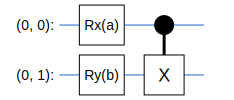

In [ ]:
# Create two qubits
q0, q1 = cirq.GridQubit.rect(1, 2)

# Create a circuit on these qubits using the parameters you created above.
circuit = cirq.Circuit(
    cirq.rx(a).on(q0),
    cirq.ry(b).on(q1), cirq.CNOT(control=q0, target=q1))

SVGCircuit(circuit)

To evaluate circuits, you can use the `cirq.Simulator` interface. You replace free parameters in a circuit with specific numbers by passing in a `cirq.ParamResolver` object. The following code calculates the raw state vector output of your parameterized circuit:

In [ ]:
# Calculate a state vector with a=0.5 and b=-0.5.
resolver = cirq.ParamResolver({a: 0.5, b: -0.5})
output_state_vector = cirq.Simulator().simulate(circuit, resolver).final_state_vector
output_state_vector

array([ 0.9387913 +0.j        , -0.23971277+0.j        ,
        0.        +0.06120872j,  0.        -0.23971277j], dtype=complex64)

State vectors are not directly accessible outside of simulation (notice the complex numbers in the output above). To be physically realistic, you must specify a measurement, which converts a state vector into a real number that classical computers can understand. Cirq specifies measurements using combinations of the <a target="_blank" href="https://en.wikipedia.org/wiki/Pauli_matrices" class="external">Pauli operators</a> $\hat{X}$, $\hat{Y}$, and $\hat{Z}$. As illustration, the following code measures $\hat{Z}_0$ and $\frac{1}{2}\hat{Z}_0 + \hat{X}_1$ on the state vector you just simulated:

In [ ]:
z0 = cirq.Z(q0)

qubit_map={q0: 0, q1: 1}

z0.expectation_from_state_vector(output_state_vector, qubit_map).real

0.8775825500488281

In [ ]:
z0x1 = 0.5 * z0 + cirq.X(q1)

z0x1.expectation_from_state_vector(output_state_vector, qubit_map).real

-0.04063427448272705

###### *Quantum circuits as tensors*

TensorFlow Quantum (TFQ) provides `tfq.convert_to_tensor`, a function that converts Cirq objects into tensors. This allows you to send Cirq objects to our <a target="_blank" href="https://www.tensorflow.org/quantum/api_docs/python/tfq/layers">quantum layers</a> and <a target="_blank" href="https://www.tensorflow.org/quantum/api_docs/python/tfq/get_expectation_op">quantum ops</a>. The function can be called on lists or arrays of Cirq Circuits and Cirq Paulis:

In [ ]:
# Rank 1 tensor containing 1 circuit.
circuit_tensor = tfq.convert_to_tensor([circuit])

print(circuit_tensor.shape)
print(circuit_tensor.dtype)

(1,)
<dtype: 'string'>


This encodes the Cirq objects as `tf.string` tensors that `tfq` operations decode as needed.

In [ ]:
# Rank 1 tensor containing 2 Pauli operators.
pauli_tensor = tfq.convert_to_tensor([z0, z0x1])
pauli_tensor.shape

TensorShape([2])

###### *Batching circuit simulation*

TFQ provides methods for computing expectation values, samples, and state vectors. For now, let's focus on *expectation values*.

The highest-level interface for calculating expectation values is the `tfq.layers.Expectation` layer, which is a `tf.keras.Layer`. In its simplest form, this layer is equivalent to simulating a parameterized circuit over many `cirq.ParamResolvers`; however, TFQ allows batching following TensorFlow semantics, and circuits are simulated using efficient C++ code.

Create a batch of values to substitute for our `a` and `b` parameters:

In [ ]:
batch_vals = np.array(np.random.uniform(0, 2 * np.pi, (5, 2)), dtype=np.float32)

Batching circuit execution over parameter values in Cirq requires a loop:

In [ ]:
cirq_results = []
cirq_simulator = cirq.Simulator()

for vals in batch_vals:
    resolver = cirq.ParamResolver({a: vals[0], b: vals[1]})
    final_state_vector = cirq_simulator.simulate(circuit, resolver).final_state_vector
    cirq_results.append(
        [z0.expectation_from_state_vector(final_state_vector, {
            q0: 0,
            q1: 1
        }).real])

print('cirq batch results: \n {}'.format(np.array(cirq_results)))

cirq batch results: 
 [[ 0.44109124]
 [ 0.79550976]
 [ 0.72810674]
 [-0.61350071]
 [-0.99411678]]


The same operation is simplified in TFQ:

In [ ]:
tfq.layers.Expectation()(circuit,
                         symbol_names=[a, b],
                         symbol_values=batch_vals,
                         operators=z0)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[ 0.44109312],
       [ 0.7955109 ],
       [ 0.7281064 ],
       [-0.6135012 ],
       [-0.99411696]], dtype=float32)>

###### *Hybrid quantum-classical optimization*

Now that you've seen the basics, let's use TensorFlow Quantum to construct a *hybrid quantum-classical neural net*. 

You will train a classical neural net to control a single qubit. 

The control will be optimized to correctly prepare the qubit in the `0` or `1` state, overcoming a simulated systematic calibration error. 

This figure shows the architecture:

![ggg](https://www.tensorflow.org/quantum/tutorials/images/nn_control1.png)

Even without a neural network this is a straightforward problem to solve, but the theme is similar to the real quantum control problems you might solve using TFQ. It demonstrates an end-to-end example of a quantum-classical computation using the `tfq.layers.ControlledPQC` (Parametrized Quantum Circuit) layer inside of a `tf.keras.Model`.

For the implementation of this tutorial, this architecture is split into 3 parts:

- The *input circuit* or *datapoint circuit*: The first three $R$ gates.
- The *controlled circuit*: The other three $R$ gates.
- The *controller*: The classical neural-network setting the parameters of the controlled circuit.

###### *The controlled circuit definition*



Define a learnable single bit rotation, as indicated in the figure above. This will correspond to our controlled circuit.

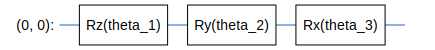

In [ ]:
# Parameters that the classical NN will feed values into.
control_params = sympy.symbols('theta_1 theta_2 theta_3')

# Create the parameterized circuit.
qubit = cirq.GridQubit(0, 0)
model_circuit = cirq.Circuit(
    cirq.rz(control_params[0])(qubit),
    cirq.ry(control_params[1])(qubit),
    cirq.rx(control_params[2])(qubit))

SVGCircuit(model_circuit)

###### *The controller*

Now define controller network: 

In [ ]:
# The classical neural network layers.
controller = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='elu'),
    tf.keras.layers.Dense(3)
])

Given a batch of commands, the controller outputs a batch of control signals for the controlled circuit. 

The controller is randomly initialized so these outputs are not useful, yet.

In [ ]:
controller(tf.constant([[0.0],[1.0]])).numpy()

array([[ 0.        ,  0.        ,  0.        ],
       [-0.17251231, -0.20490563, -0.181742  ]], dtype=float32)

###### *Connect the controller to the circuit*

Use `tfq` to connect the controller to the controlled circuit, as a single `keras.Model`. 

See the [Keras Functional API guide](https://www.tensorflow.org/guide/keras/functional) for more about this style of model definition.

First define the inputs to the model:  

In [ ]:
# This input is the simulated miscalibration that the model will learn to correct.
circuits_input = tf.keras.Input(shape=(),
                                # The circuit-tensor has dtype `tf.string` 
                                dtype=tf.string,
                                name='circuits_input')

# Commands will be either `0` or `1`, specifying the state to set the qubit to.
commands_input = tf.keras.Input(shape=(1,),
                                dtype=tf.dtypes.float32,
                                name='commands_input')


Next apply operations to those inputs, to define the computation.

In [ ]:
dense_2 = controller(commands_input)

# TFQ layer for classically controlled circuits.
expectation_layer = tfq.layers.ControlledPQC(model_circuit,
                                             # Observe Z
                                             operators = cirq.Z(qubit))
expectation = expectation_layer([circuits_input, dense_2])

Now package this computation as a `tf.keras.Model`:

In [ ]:
# The full Keras model is built from our layers.
model = tf.keras.Model(inputs=[circuits_input, commands_input],
                       outputs=expectation)

The network architecture is indicated by the plot of the model below.
Compare this model plot to the architecture diagram to verify correctness.

Note: May require a system install of the `graphviz` package.

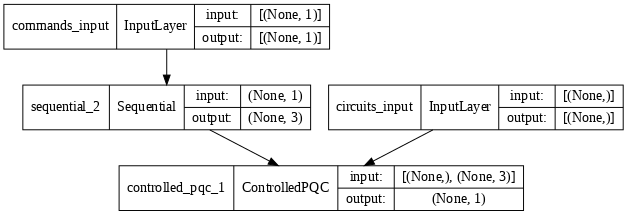

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=70)

This model takes two inputs: The commands for the controller, and the input-circuit whose output the controller is attempting to correct. 

###### *Dataset*

The model attempts to output the correct correct measurement value of $\hat{Z}$ for each command. The commands and correct values are defined below.

In [ ]:
# The command input values to the classical NN.
commands = np.array([[0], [1]], dtype=np.float32)

# The desired Z expectation value at output of quantum circuit.
expected_outputs = np.array([[1], [-1]], dtype=np.float32)

This is not the entire training dataset for this task. 
Each datapoint in the dataset also needs an input circuit.

###### *Input circuit definition*

The input-circuit below defines the random miscalibration the model will learn to correct.

In [ ]:
random_rotations = np.random.uniform(0, 2 * np.pi, 3)
noisy_preparation = cirq.Circuit(
  cirq.rx(random_rotations[0])(qubit),
  cirq.ry(random_rotations[1])(qubit),
  cirq.rz(random_rotations[2])(qubit)
)
datapoint_circuits = tfq.convert_to_tensor([
  noisy_preparation
] * 2)  # Make two copied of this circuit

There are two copies of the circuit, one for each datapoint.

In [ ]:
datapoint_circuits.shape

TensorShape([2])

###### *Training*

With the inputs defined you can test-run the `tfq` model.

In [ ]:
model([datapoint_circuits, commands]).numpy()

array([[-0.7188244],
       [-0.7248006]], dtype=float32)

Now run a standard training process to adjust these values towards the `expected_outputs`.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)
history = model.fit(x=[datapoint_circuits, commands],
                    y=expected_outputs,
                    epochs=30,
                    verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 856ms/step - loss: 0.0018
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 4/30
1/1 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 6/30
1/1 [==============================] - 0s 15ms/step - loss: 0.0022
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 8/30
1/1 [==============================] - 0s 10ms/step - loss: 4.8995e-04
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 10/30
1/1 [==============================] - 0s 20ms/step - loss: 0.0043
Epoch 11/30
1/1 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 12/30
1/1 [==============================] - 0s 13ms/step - loss: 5.6961e-04
Epoch 13/30
1/1 [==============================] - 0s 8m

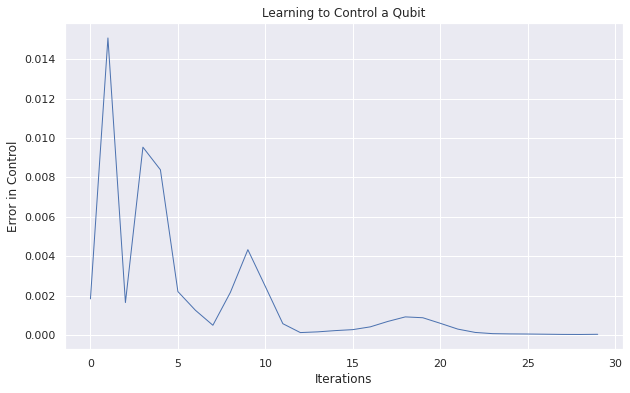

In [ ]:
sns.set(rc={'figure.figsize':(10, 6), "lines.linewidth": 1.0})
plt.plot(history.history['loss'])
plt.title("Learning to Control a Qubit")
plt.xlabel("Iterations")
plt.ylabel("Error in Control")
plt.show()

From this plot you can see that the neural network has learned to overcome the systematic miscalibration.

###### *Verify outputs*

Now use the trained model, to correct the qubit calibration errors. With Cirq:

In [ ]:
def check_error(command_values, desired_values):
  """Based on the value in `command_value` see how well you could prepare
  the full circuit to have `desired_value` when taking expectation w.r.t. Z."""
  params_to_prepare_output = controller(command_values).numpy()
  full_circuit = noisy_preparation + model_circuit

  # Test how well you can prepare a state to get expectation the expectation
  # value in `desired_values`
  for index in [0, 1]:
    state = cirq_simulator.simulate(
        full_circuit,
        {s:v for (s,v) in zip(control_params, params_to_prepare_output[index])}
    ).final_state_vector
    expt = cirq.Z(qubit).expectation_from_state_vector(state, {qubit: 0}).real
    print(f'For a desired output (expectation) of {desired_values[index]} with'
          f' noisy preparation, the controller\nnetwork found the following '
          f'values for theta: {params_to_prepare_output[index]}\nWhich gives an'
          f' actual expectation of: {expt}\n')


check_error(commands, expected_outputs)

For a desired output (expectation) of [1.] with noisy preparation, the controller
network found the following values for theta: [ 2.1556914  -0.49009842  3.4417377 ]
Which gives an actual expectation of: 0.9527387022972107

For a desired output (expectation) of [-1.] with noisy preparation, the controller
network found the following values for theta: [ 0.11179268  0.04922989 -0.5141916 ]
Which gives an actual expectation of: -0.962244987487793



The value of the loss function during training provides a rough idea of how well the model is learning. The lower the loss, the closer the expectation values in the above cell is to `desired_values`. If you aren't as concerned with the parameter values, you can always check the outputs from above using `tfq`:

In [ ]:
model([datapoint_circuits, commands])

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 0.95273864],
       [-0.96224546]], dtype=float32)>

##### ***Use Case 2: Quantum Convolutional Neural Network***

**Assets**

* Homepage: [tensorflow.org/quantum](https://www.tensorflow.org/quantum)

* See following notebook and many more information [here](https://www.tensorflow.org/quantum/tutorials/qcnn)

**Quantum Convolutional Neural Network**

This tutorial implements a simplified [Quantum Convolutional Neural Network (QCNN)](https://www.nature.com/articles/s41567-019-0648-8), a proposed quantum analogue to a classical convolutional neural network that is also translationally invariant.

This example demonstrates how to detect certain properties of a quantum data source, such as a quantum sensor or a complex simulation from a device. The quantum data source being a [cluster state](https://arxiv.org/pdf/quant-ph/0504097.pdf) that may or may not have an excitation—what the QCNN will learn to detect (The dataset used in the paper was SPT phase classification).

###### *Assemble circuits in a TensorFlow graph*

TensorFlow Quantum (TFQ) provides layer classes designed for in-graph circuit construction. One example is the tfq.layers.AddCircuit layer that inherits from tf.keras.Layer. This layer can either prepend or append to the input batch of circuits, as shown in the following figure.

![layer](https://www.tensorflow.org/quantum/tutorials/images/qcnn_1.png)

In [ ]:
qubit = cirq.GridQubit(0, 0)

# Define some circuits.
circuit1 = cirq.Circuit(cirq.X(qubit))
circuit2 = cirq.Circuit(cirq.H(qubit))

# Convert to a tensor.
input_circuit_tensor = tfq.convert_to_tensor([circuit1, circuit2])

# Define a circuit that we want to append
y_circuit = cirq.Circuit(cirq.Y(qubit))

# Instantiate our layer
y_appender = tfq.layers.AddCircuit()

# Run our circuit tensor through the layer and save the output.
output_circuit_tensor = y_appender(input_circuit_tensor, append=y_circuit)

# Examine the input tensor:
print('input tensor')
print(tfq.from_tensor(input_circuit_tensor))

# And examine the output tensor:
print('output tensor')
print(tfq.from_tensor(output_circuit_tensor))


input tensor
[cirq.Circuit([
     cirq.Moment(
         cirq.X(cirq.GridQubit(0, 0)),
     ),
 ])
 cirq.Circuit([
     cirq.Moment(
         cirq.H(cirq.GridQubit(0, 0)),
     ),
 ])                                   ]
output tensor
[cirq.Circuit([
     cirq.Moment(
         cirq.X(cirq.GridQubit(0, 0)),
     ),
     cirq.Moment(
         cirq.Y(cirq.GridQubit(0, 0)),
     ),
 ])
 cirq.Circuit([
     cirq.Moment(
         cirq.H(cirq.GridQubit(0, 0)),
     ),
     cirq.Moment(
         cirq.Y(cirq.GridQubit(0, 0)),
     ),
 ])                                   ]


While it is possible to run the examples below without using tfq.layers.AddCircuit, it's a good opportunity to understand how complex functionality can be embedded into TensorFlow compute graphs.



###### *Problem overview*

You will prepare a *cluster state* and train a quantum classifier to detect if it is "excited" or not. The cluster state is highly entangled but not necessarily difficult for a classical computer. For clarity, this is a simpler dataset than the one used in the paper.

For this classification task you will implement a deep <a href="https://arxiv.org/pdf/quant-ph/0610099.pdf" class="external">MERA</a>-like QCNN architecture since:

1.   Like the QCNN, the cluster state on a ring is translationally invariant.
2.   The cluster state is highly entangled.

This architecture should be effective at reducing entanglement, obtaining the classification by reading out a single qubit.

![layer](https://www.tensorflow.org/quantum/tutorials/images/qcnn_2.png)

An "excited" cluster state is defined as a cluster state that had a `cirq.rx` gate applied to any of its qubits. Qconv and QPool are discussed later in this tutorial.

###### *Building blocks for TensorFlow*

![layer](https://www.tensorflow.org/quantum/tutorials/images/qcnn_3.png)


One way to solve this problem with TensorFlow Quantum is to implement the following:

1. The input to the model is a circuit tensor—either an empty circuit or an X gate on a particular qubit indicating an excitation.
2. The rest of the model's quantum components are constructed with `tfq.layers.AddCircuit` layers.
3. For inference a `tfq.layers.PQC` layer is used. This reads $\langle \hat{Z} \rangle$ and compares it to a label of 1 for an excited state, or -1 for a non-excited state.

###### *Data*

Before building your model, you can generate your data. In this case it's going to be excitations to the cluster state (The original paper uses a more complicated dataset). Excitations are represented with `cirq.rx` gates. A large enough rotation is deemed an excitation and is labeled `1` and a rotation that isn't large enough is labeled `-1` and deemed not an excitation.

In [ ]:
def generate_data(qubits):
    """Generate training and testing data."""
    n_rounds = 20  # Produces n_rounds * n_qubits datapoints.
    excitations = []
    labels = []
    for n in range(n_rounds):
        for bit in qubits:
            rng = np.random.uniform(-np.pi, np.pi)
            excitations.append(cirq.Circuit(cirq.rx(rng)(bit)))
            labels.append(1 if (-np.pi / 2) <= rng <= (np.pi / 2) else -1)

    split_ind = int(len(excitations) * 0.7)
    train_excitations = excitations[:split_ind]
    test_excitations = excitations[split_ind:]

    train_labels = labels[:split_ind]
    test_labels = labels[split_ind:]

    return tfq.convert_to_tensor(train_excitations), np.array(train_labels), \
        tfq.convert_to_tensor(test_excitations), np.array(test_labels)

You can see that just like with regular machine learning you create a training and testing set to use to benchmark the model. You can quickly look at some datapoints with:

In [ ]:
sample_points, sample_labels, _, __ = generate_data(cirq.GridQubit.rect(1, 4))
print('Input:', tfq.from_tensor(sample_points)[0], 'Output:', sample_labels[0])
print('Input:', tfq.from_tensor(sample_points)[1], 'Output:', sample_labels[1])

Input: (0, 0): ───X^-0.516─── Output: -1
Input: (0, 1): ───X^0.495─── Output: 1


###### *Define layers*

Now define the layers shown in the figure above in TensorFlow.


**Cluster state**

The first step is to define the <a href="https://arxiv.org/pdf/quant-ph/0504097.pdf" class="external">cluster state</a> using <a href="https://github.com/quantumlib/Cirq" class="external">Cirq</a>, a Google-provided framework for programming quantum circuits. Since this is a static part of the model, embed it using the `tfq.layers.AddCircuit` functionality.

In [ ]:
def cluster_state_circuit(bits):
    """Return a cluster state on the qubits in `bits`."""
    circuit = cirq.Circuit()
    circuit.append(cirq.H.on_each(bits))
    for this_bit, next_bit in zip(bits, bits[1:] + [bits[0]]):
        circuit.append(cirq.CZ(this_bit, next_bit))
    return circuit

Display a cluster state circuit for a rectangle of <a href="https://cirq.readthedocs.io/en/stable/generated/cirq.GridQubit.html" class="external"><code>cirq.GridQubit</code></a>s:

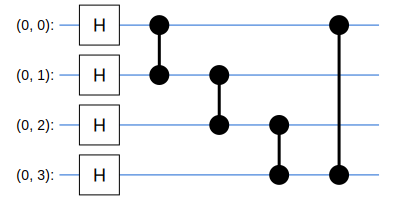

In [ ]:
SVGCircuit(cluster_state_circuit(cirq.GridQubit.rect(1, 4)))

**QCNN layers**

Define the layers that make up the model using the <a href="https://arxiv.org/abs/1810.03787" class="external">Cong and Lukin QCNN paper</a>. There are a few prerequisites:

* The one- and two-qubit parameterized unitary matrices from the <a href="https://arxiv.org/abs/quant-ph/0507171" class="external">Tucci paper</a>.
* A general parameterized two-qubit pooling operation.

In [ ]:
def one_qubit_unitary(bit, symbols):
    """Make a Cirq circuit enacting a rotation of the bloch sphere about the X,
    Y and Z axis, that depends on the values in `symbols`.
    """
    return cirq.Circuit(
        cirq.X(bit)**symbols[0],
        cirq.Y(bit)**symbols[1],
        cirq.Z(bit)**symbols[2])


def two_qubit_unitary(bits, symbols):
    """Make a Cirq circuit that creates an arbitrary two qubit unitary."""
    circuit = cirq.Circuit()
    circuit += one_qubit_unitary(bits[0], symbols[0:3])
    circuit += one_qubit_unitary(bits[1], symbols[3:6])
    circuit += [cirq.ZZ(*bits)**symbols[6]]
    circuit += [cirq.YY(*bits)**symbols[7]]
    circuit += [cirq.XX(*bits)**symbols[8]]
    circuit += one_qubit_unitary(bits[0], symbols[9:12])
    circuit += one_qubit_unitary(bits[1], symbols[12:])
    return circuit


def two_qubit_pool(source_qubit, sink_qubit, symbols):
    """Make a Cirq circuit to do a parameterized 'pooling' operation, which
    attempts to reduce entanglement down from two qubits to just one."""
    pool_circuit = cirq.Circuit()
    sink_basis_selector = one_qubit_unitary(sink_qubit, symbols[0:3])
    source_basis_selector = one_qubit_unitary(source_qubit, symbols[3:6])
    pool_circuit.append(sink_basis_selector)
    pool_circuit.append(source_basis_selector)
    pool_circuit.append(cirq.CNOT(control=source_qubit, target=sink_qubit))
    pool_circuit.append(sink_basis_selector**-1)
    return pool_circuit

To see what you created, print out the one-qubit unitary circuit:

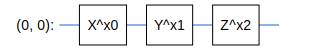

In [ ]:
SVGCircuit(one_qubit_unitary(cirq.GridQubit(0, 0), sympy.symbols('x0:3')))

And the two-qubit unitary circuit:

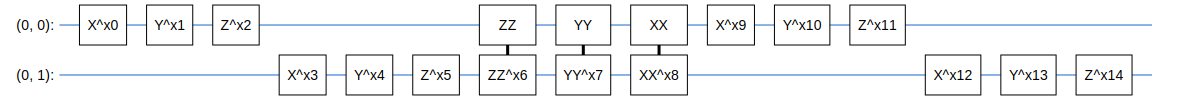

In [ ]:
SVGCircuit(two_qubit_unitary(cirq.GridQubit.rect(1, 2), sympy.symbols('x0:15')))

And the two-qubit pooling circuit:

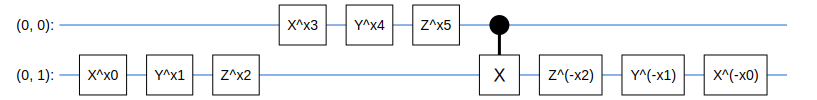

In [ ]:
SVGCircuit(two_qubit_pool(*cirq.GridQubit.rect(1, 2), sympy.symbols('x0:6')))

**Quantum convolution**

As in the <a href="https://arxiv.org/abs/1810.03787" class="external">Cong and Lukin</a> paper, define the 1D quantum convolution as the application of a two-qubit parameterized unitary to every pair of adjacent qubits with a stride of one.

In [ ]:
def quantum_conv_circuit(bits, symbols):
    """Quantum Convolution Layer following the above diagram.
    Return a Cirq circuit with the cascade of `two_qubit_unitary` applied
    to all pairs of qubits in `bits` as in the diagram above.
    """
    circuit = cirq.Circuit()
    for first, second in zip(bits[0::2], bits[1::2]):
        circuit += two_qubit_unitary([first, second], symbols)
    for first, second in zip(bits[1::2], bits[2::2] + [bits[0]]):
        circuit += two_qubit_unitary([first, second], symbols)
    return circuit

Display the (very horizontal) circuit:

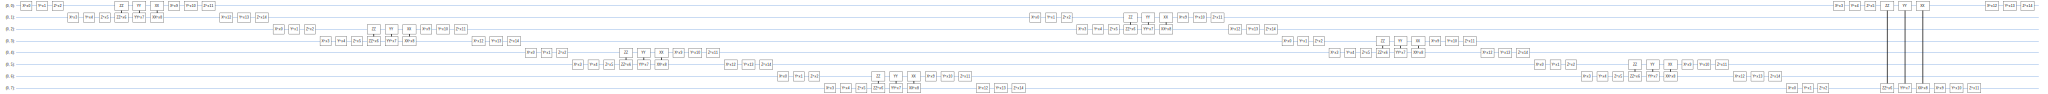

In [ ]:
SVGCircuit(
    quantum_conv_circuit(cirq.GridQubit.rect(1, 8), sympy.symbols('x0:15')))

**Quantum pooling**

A quantum pooling layer pools from $N$ qubits to $\frac{N}{2}$ qubits using the two-qubit pool defined above.

In [ ]:
def quantum_pool_circuit(source_bits, sink_bits, symbols):
    """A layer that specifies a quantum pooling operation.
    A Quantum pool tries to learn to pool the relevant information from two
    qubits onto 1.
    """
    circuit = cirq.Circuit()
    for source, sink in zip(source_bits, sink_bits):
        circuit += two_qubit_pool(source, sink, symbols)
    return circuit

Examine a pooling component circuit:

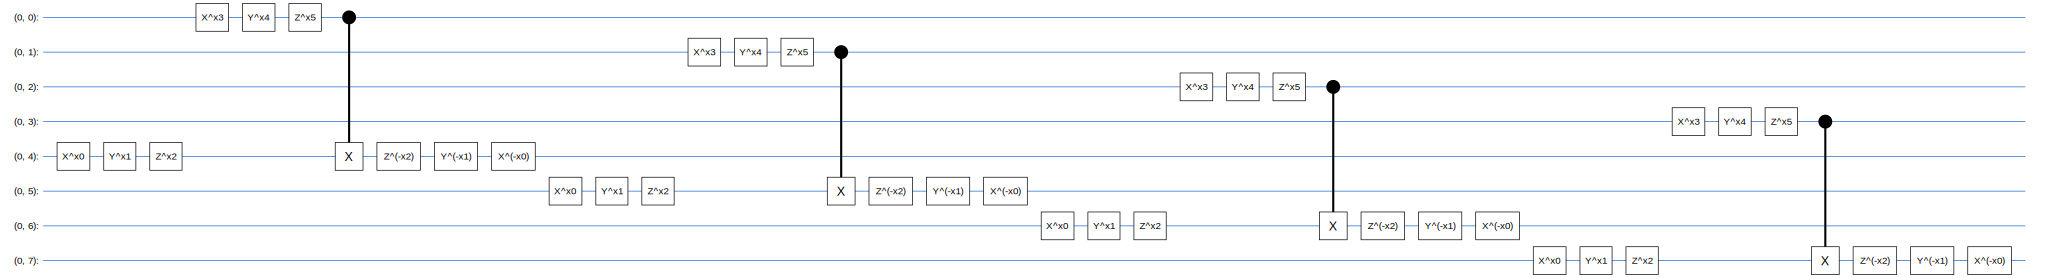

In [ ]:
test_bits = cirq.GridQubit.rect(1, 8)

SVGCircuit(
    quantum_pool_circuit(test_bits[:4], test_bits[4:], sympy.symbols('x0:6')))

###### *Model definition*

Now use the defined layers to construct a purely quantum CNN. Start with eight qubits, pool down to one, then measure $\langle \hat{Z} \rangle$.

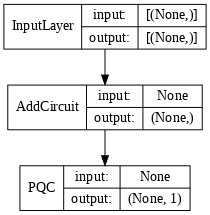

In [ ]:
def create_model_circuit(qubits):
    """Create sequence of alternating convolution and pooling operators 
    which gradually shrink over time."""
    model_circuit = cirq.Circuit()
    symbols = sympy.symbols('qconv0:63')
    # Cirq uses sympy.Symbols to map learnable variables. TensorFlow Quantum
    # scans incoming circuits and replaces these with TensorFlow variables.
    model_circuit += quantum_conv_circuit(qubits, symbols[0:15])
    model_circuit += quantum_pool_circuit(qubits[:4], qubits[4:],
                                          symbols[15:21])
    model_circuit += quantum_conv_circuit(qubits[4:], symbols[21:36])
    model_circuit += quantum_pool_circuit(qubits[4:6], qubits[6:],
                                          symbols[36:42])
    model_circuit += quantum_conv_circuit(qubits[6:], symbols[42:57])
    model_circuit += quantum_pool_circuit([qubits[6]], [qubits[7]],
                                          symbols[57:63])
    return model_circuit


# Create our qubits and readout operators in Cirq.
cluster_state_bits = cirq.GridQubit.rect(1, 8)
readout_operators = cirq.Z(cluster_state_bits[-1])

# Build a sequential model enacting the logic in 1.3 of this notebook.
# Here you are making the static cluster state prep as a part of the AddCircuit and the
# "quantum datapoints" are coming in the form of excitation
excitation_input = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
cluster_state = tfq.layers.AddCircuit()(
    excitation_input, prepend=cluster_state_circuit(cluster_state_bits))

quantum_model = tfq.layers.PQC(create_model_circuit(cluster_state_bits),
                               readout_operators)(cluster_state)

qcnn_model = tf.keras.Model(inputs=[excitation_input], outputs=[quantum_model])

# Show the keras plot of the model
tf.keras.utils.plot_model(qcnn_model,
                          show_shapes=True,
                          show_layer_names=False,
                          dpi=70)

###### *Model Training*

Train the model over the full batch to simplify this example.

In [ ]:
# Generate some training data.
train_excitations, train_labels, test_excitations, test_labels = generate_data(
    cluster_state_bits)


# Custom accuracy metric.
@tf.function
def custom_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true)
    y_pred = tf.map_fn(lambda x: 1.0 if x >= 0 else -1.0, y_pred)
    return tf.keras.backend.mean(tf.keras.backend.equal(y_true, y_pred))


qcnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                   loss=tf.losses.mse,
                   metrics=[custom_accuracy])

history = qcnn_model.fit(x=train_excitations,
                         y=train_labels,
                         batch_size=16,
                         epochs=25,
                         verbose=1,
                         validation_data=(test_excitations, test_labels))

Epoch 1/25
7/7 [==============================] - 3s 254ms/step - loss: 0.9426 - custom_accuracy: 0.6607 - val_loss: 0.8458 - val_custom_accuracy: 0.8333
Epoch 2/25
7/7 [==============================] - 2s 301ms/step - loss: 0.8144 - custom_accuracy: 0.7054 - val_loss: 0.7629 - val_custom_accuracy: 0.8542
Epoch 3/25
7/7 [==============================] - 2s 309ms/step - loss: 0.7155 - custom_accuracy: 0.8036 - val_loss: 0.6316 - val_custom_accuracy: 0.7708
Epoch 4/25
7/7 [==============================] - 2s 306ms/step - loss: 0.6059 - custom_accuracy: 0.8393 - val_loss: 0.6107 - val_custom_accuracy: 0.8125
Epoch 5/25
7/7 [==============================] - 2s 282ms/step - loss: 0.6150 - custom_accuracy: 0.7946 - val_loss: 0.5924 - val_custom_accuracy: 0.7708
Epoch 6/25
7/7 [==============================] - 2s 242ms/step - loss: 0.6086 - custom_accuracy: 0.8304 - val_loss: 0.5703 - val_custom_accuracy: 0.7917
Epoch 7/25
7/7 [==============================] - 2s 235ms/step - loss: 0.58

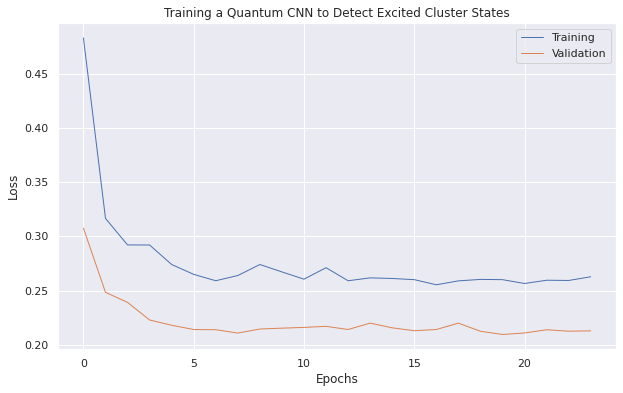

In [ ]:
sns.set(rc={'figure.figsize':(10, 6), "lines.linewidth": 1.0})
plt.plot(history.history['loss'][1:], label='Training')
plt.plot(history.history['val_loss'][1:], label='Validation')
plt.title('Training a Quantum CNN to Detect Excited Cluster States')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

For training Hybrid models see [documentation here](https://www.tensorflow.org/quantum/tutorials/qcnn#2_hybrid_models)

#### **Part 3: Quantum Emulation with <font color="blue">Quantum Virtual Machine**

[Quantum-Virtual-Machine](https://quantumai.google/quantum-virtual-machine)

* https://quantumai.google/cirq/simulate/quantum_virtual_machine

* Emulates a Google quantum computer

* Provision a QVM in one click with Colab, or learn more about the QVM (how to build your own custom QVM, how to use it to make your circuits perform well on current day quantum hardware)

* See documentation [here](https://quantumai.google/cirq/simulate/quantum_virtual_machine) and launch a QVM learning version [in Colab](https://colab.sandbox.google.com/github/quantumlib/Cirq/blob/master/docs/simulate/qvm_basic_example.ipynb)